# Part 1: Data Preprocessing

Dataset Link: https://www.kaggle.com/datasets/mirichoi0218/insurance

## Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/insurance.csv')

## Data Exploration

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

3

In [ ]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

4

In [ ]:
# Statistical Summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by 'sex', 'smoker', 'region'

In [ ]:
dataset.groupby('sex').mean()

<ipython-input-72-859a65e13e71>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [ ]:
dataset.groupby('smoker').mean()
# inference: if smoker yes then charges more

<ipython-input-73-7a7d40b4bb92>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('smoker').mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [ ]:
dataset.groupby('region').mean()

<ipython-input-74-a56bc4f3bc6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with missing values

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isnull().values.sum()

0

## Distplot

<Figure size 2000x2000 with 0 Axes>

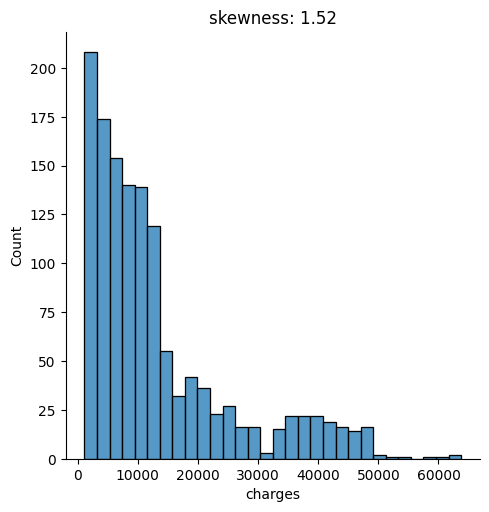

In [123]:
# distplot of target variable
plt.figure(figsize=(20, 20))
bar = sns.displot(dataset['charges'])
bar.set(title=f'skewness: {dataset["charges"].skew():.2f}')
plt.show()

## Encoding the categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# One hot encoding
dataset  =pd.get_dummies(data=dataset, drop_first= True)

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
dataset.shape

(1338, 9)

## Correlation Matrix

In [ ]:
dataset_2 = dataset.drop(columns='charges')
dataset_2

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


<Axes: title={'center': 'Correlation with charges'}>

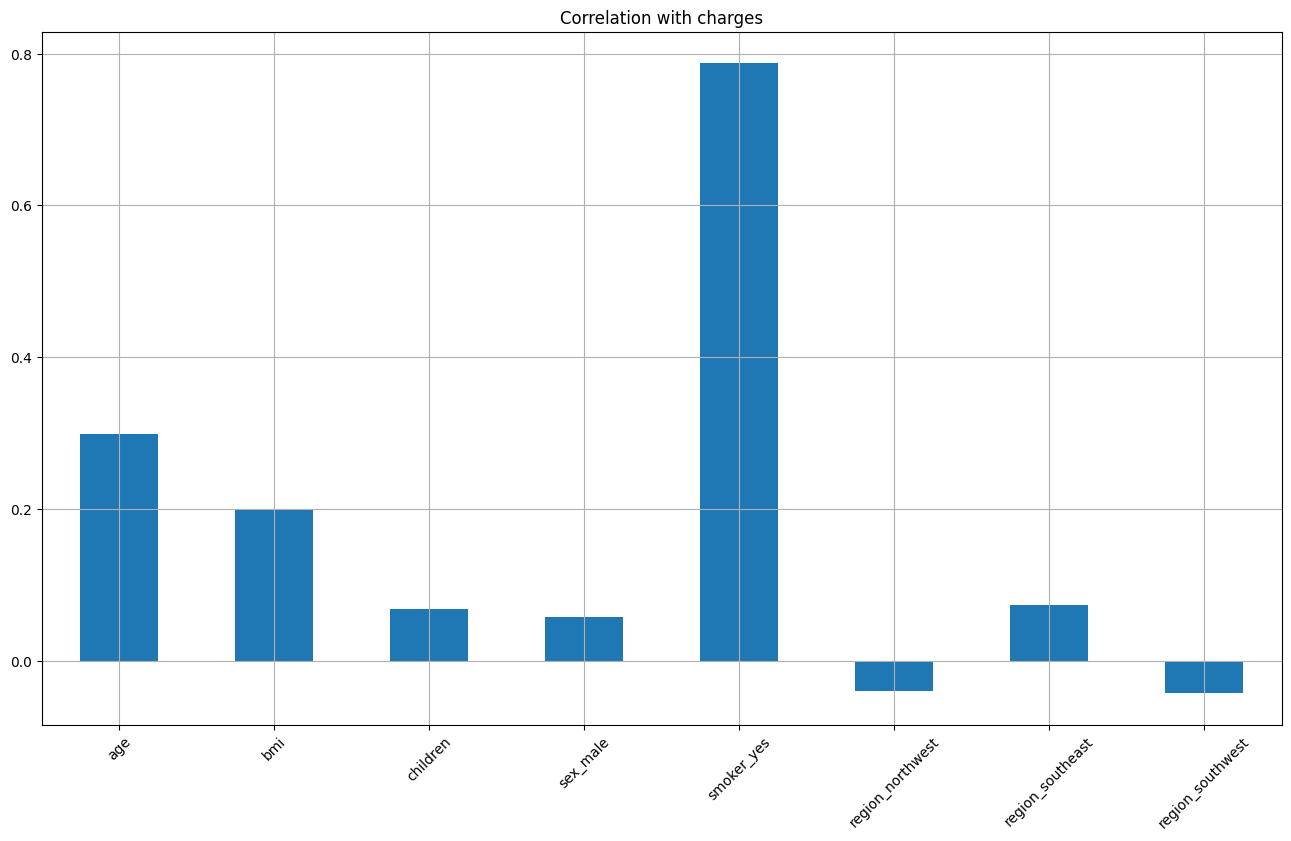

In [ ]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title= 'Correlation with charges', rot= 45, grid = True
)

In [ ]:
corr = dataset.corr()

<Axes: >

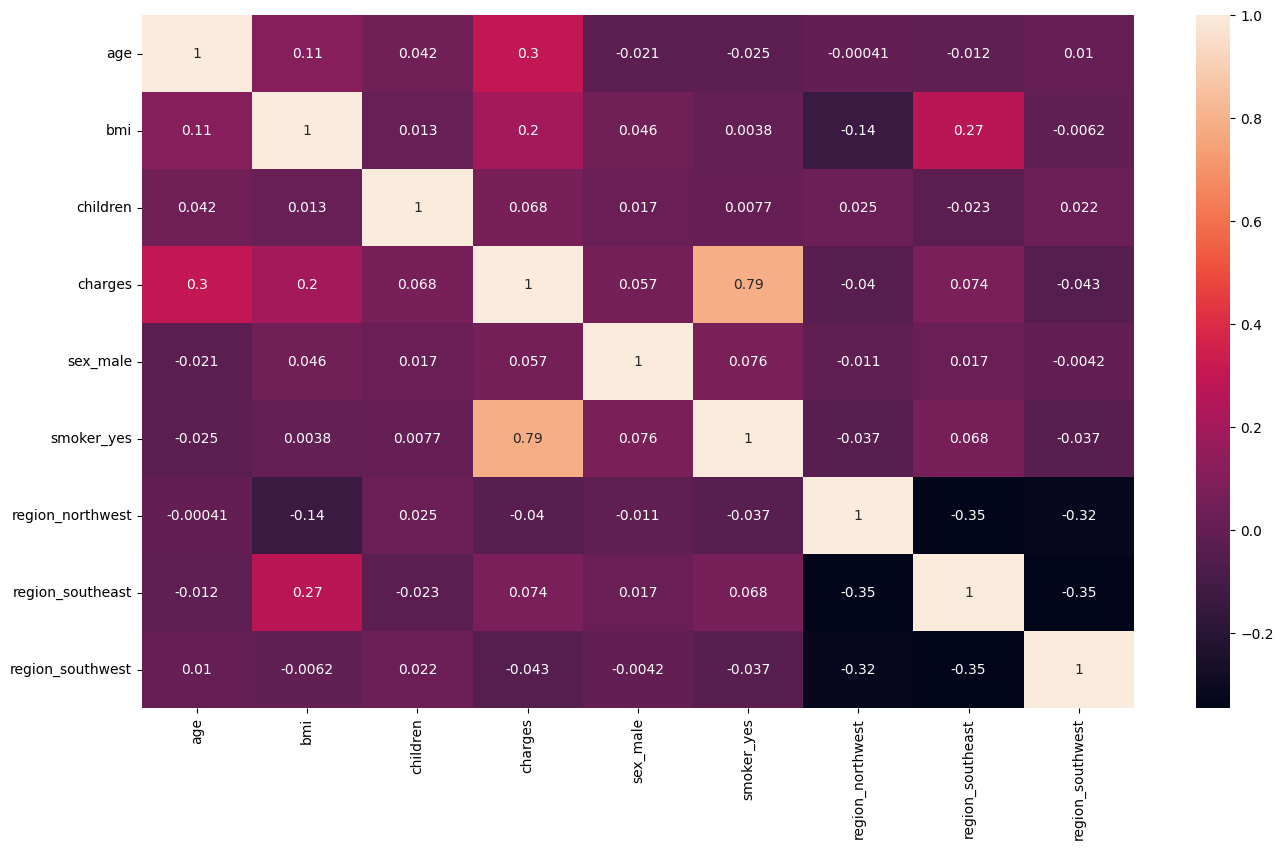

In [ ]:
# Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
# Matrix of features/ independent variable
x = dataset.drop(columns='charges')

In [ ]:
x.shape

(1338, 8)

In [ ]:
# Target or dependent variable
y = dataset['charges']

In [ ]:
y.shape

(1338,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size =0.2,random_state=0)

In [ ]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(1070, 8)

(268, 8)

(1070,)

(268,)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print(x_test)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
578    52  30.200         1         1           0                 0   
610    47  29.370         1         0           0                 0   
569    48  40.565         2         1           1                 1   
1034   61  38.380         0         1           0                 1   
198    51  18.050         0         0           0                 1   
...   ...     ...       ...       ...         ...               ...   
1084   62  30.495         2         0           0                 1   
726    41  28.405         1         1           0                 1   
1132   57  40.280         0         1           0                 0   
725    30  39.050         3         0           1                 0   
963    46  24.795         3         1           0                 0   

      region_southeast  region_southwest  
578                  0                 1  
610                  1                 0  
569               

In [ ]:
print(x_train)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
621    37  34.100         4         1           1                 0   
194    18  34.430         0         1           0                 0   
240    23  36.670         2         0           1                 0   
1168   32  35.200         2         1           0                 0   
1192   58  32.395         1         0           0                 0   
...   ...     ...       ...       ...         ...               ...   
763    27  26.030         0         1           0                 0   
835    42  35.970         2         1           0                 0   
1216   40  25.080         0         1           0                 0   
559    19  35.530         0         1           0                 1   
684    33  18.500         1         0           0                 0   

      region_southeast  region_southwest  
621                  0                 1  
194                  1                 0  
240               

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [ ]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part 2: Building the model

## 1) Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor_lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred) # coefficient of determination

0.7999876970680433

## 2) Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor_rf.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8820321417856349

## 3) XGBoost regression

In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
regressor_rgb = XGBRFRegressor()

In [ ]:
regressor_rgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
y_pred = regressor_rgb.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8994492709535864

By seeing the r square value XGBRFReggressor performs well

# Part 3: Predict charges for a new customer

In [ ]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Example 1

In [ ]:
frank_obs = [[40, 45.5, 4, 1, 1, 0,0,0]]

In [ ]:
regressor_rgb.predict(sc.transform(frank_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43421.676], dtype=float32)

In [ ]:
regressor_rf.predict(sc.transform(frank_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44399.2760936])

### Example 2

In [ ]:
sara_obs = [[19,27,0,0,0,0,0,0]]
display(regressor_rgb.predict(sc.transform(sara_obs)))
display(regressor_rf.predict(sc.transform(sara_obs)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2557.0286], dtype=float32)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2082.408217])

### Results and Conclusions
The analysis uncovers deep insights into factors affecting insurance charges. Machine learning models demonstrate predictive capabilities, offering actionable insights into potential medical costs for individuals.

### Key Findings and Formulas
Smoking Impact Index: Indicates the relative impact of smoking on charges.

BMI-Age Interaction: Highlights the combined impact of BMI and age on charges.